In [ ]:
!pip install qiskit-aer

In [ ]:
!pip install qiskit

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

In [4]:
def get_counts_from_qc(circuit):
  shots = 30000
  backend = AerSimulator()
  transpiled_circuit = transpile(circuit, backend)
  result = backend.run(transpiled_circuit, shots=shots).result()
  counts = result.get_counts()
  normalized_counts = {key: (value / shots) for key, value in counts.items()}
  return normalized_counts

In [9]:
n = 4

qubits = QuantumRegister(n)
clbits = ClassicalRegister(n)
qc = QuantumCircuit(qubits, clbits)
(q0, q1, q2, q3) = qubits
(c0, c1, c2, c3) = clbits

# ENTANGLEMENT GENERATION
# generate entanglement between q0, q1 and q2, q3
qc.h([q0, q2])
qc.cx(q0,q1)
qc.cx(q2,q3)
qc.barrier()

# ENTANGLEMENT SWAPPING
# convert q1 and q2 from Bell basis to computational basis
qc.cx(q1,q2)
qc.h(q1)
qc.barrier()

qc.measure(q1,c1)
qc.measure(q2,c2)

# measure to see what Bell state we have in qubits 1 and 2,
# telling us what Bell state we have in qubits 0 and 4

qc.barrier()

# bell state in q0, q4 corrections based on bell measurement
with qc.if_test((c1,0)):
  with qc.if_test((c2,0)):
    qc.id(q3)
qc.barrier()

with qc.if_test((c1,1)):
    with qc.if_test((c2,0)):
      qc.z(q3)
qc.barrier()

with qc.if_test((c1,0)):
  with qc.if_test((c2,1)):
    qc.x(q3)
qc.barrier()

with qc.if_test((c1,1)):
  with qc.if_test((c2,1)):
    qc.x(q3)
    qc.z(q3)

qc.barrier()
qc.measure(q0,c0)
qc.measure(q3,c3)


qc.draw()

┌───┐      ░            ░        ░                              »
q12_0: ┤ H ├──■───░────────────░────────░──────────────────────────────»
       └───┘┌─┴─┐ ░      ┌───┐ ░ ┌─┐    ░                              »
q12_1: ─────┤ X ├─░───■──┤ H ├─░─┤M├────░──────────────────────────────»
       ┌───┐└───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                              »
q12_2: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░──────────────────────────────»
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░   ┌──────     ┌──────   ┌───┐»
q12_3: ─────┤ X ├─░────────────░──╫──╫──░───┤ If-0  ────┤ If-1  ──┤ I ├»
            └───┘ ░            ░  ║  ║  ░   └──╥───     └──╥───   └───┘»
                                  ║  ║    ┌────╨─────┐┌────╨─────┐     »
 c3: 4/═══════════════════════════╩══╩════╡ c3_1=0x0 ╞╡ c3_2=0x0 ╞═════»
                                  1  2    └──────────┘└──────────┘     »
«                            ░                                                 »
«q12_0: ─────────────────────░─────────────────────────────────────────────────»
«                            ░                                                 »
«q12_1: ─────────────────────░─────────────────────────────────────────────────»
«                            ░                                                 »
«q12_2: ─────────────────────░─────────────────────────────────────────────────»
«        ───────┐  ───────┐  ░   ┌──────     ┌──────   ┌───┐ ───────┐  ───────┐»
«q12_3:   End-1 ├─  End-0 ├──░───┤ If-0  ────┤ If-1  ──┤ Z ├  End-1 ├─  End-0 ├»
«        ───────┘  ───────┘  ░   └──╥───     └──╥───   └───┘ ───────┘  ───────┘»
«                              ┌────╨─────┐┌────╨─────┐                        »
« c3: 4/═══════════════════════╡ c3_1=0x1 ╞╡ c3_2=0x0 ╞════════════════════════»
«                              └──────────┘└──────────┘                        »
«         ░                                                   ░             »
«q12_0: ──░───────────────────────────────────────────────────░─────────────»
«         ░                                                   ░             »
«q12_1: ──░───────────────────────────────────────────────────░─────────────»
«         ░                                                   ░             »
«q12_2: ──░───────────────────────────────────────────────────░─────────────»
«         ░   ┌──────     ┌──────   ┌───┐ ───────┐  ───────┐  ░   ┌──────   »
«q12_3: ──░───┤ If-0  ────┤ If-1  ──┤ X ├  End-1 ├─  End-0 ├──░───┤ If-0  ──»
«         ░   └──╥───     └──╥───   └───┘ ───────┘  ───────┘  ░   └──╥───   »
«           ┌────╨─────┐┌────╨─────┐                            ┌────╨─────┐»
« c3: 4/════╡ c3_1=0x0 ╞╡ c3_2=0x1 ╞════════════════════════════╡ c3_1=0x1 ╞»
«           └──────────┘└──────────┘                            └──────────┘»
«                                                  ░ ┌─┐   
«q12_0: ───────────────────────────────────────────░─┤M├───
«                                                  ░ └╥┘   
«q12_1: ───────────────────────────────────────────░──╫────
«                                                  ░  ║    
«q12_2: ───────────────────────────────────────────░──╫────
«         ┌──────   ┌───┐┌───┐ ───────┐  ───────┐  ░  ║ ┌─┐
«q12_3: ──┤ If-1  ──┤ X ├┤ Z ├  End-1 ├─  End-0 ├──░──╫─┤M├
«         └──╥───   └───┘└───┘ ───────┘  ───────┘  ░  ║ └╥┘
«       ┌────╨─────┐                                  ║  ║ 
« c3: 4/╡ c3_2=0x1 ╞══════════════════════════════════╩══╩═
«       └──────────┘                                  0  3

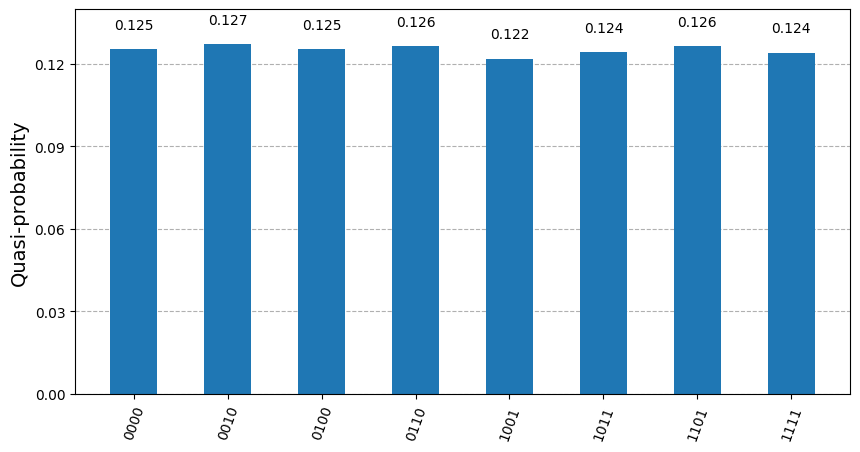

In [10]:
plot_histogram(get_counts_from_qc(qc), figsize=(10,5))